# RMSD Restraints testing

This notebook contains extensive testing of the RMSD restraints features implemented within the Sire framework

In [1]:
import sire as sr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sys import stdout

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [2]:
def obtain_rmsd(mols, selection_str="atomname CA, C, N"):
    """
    Calculate the backbone RMSD
    """

    rmsd_df = mols.trajectory().rmsd(selection_str, to_pandas=True)

    return rmsd_df['rmsd'].to_numpy()

## Basic functionality

dynamics                  29 s 4336.7 steps / s          


/home/btan/miniconda3/envs/openbiosim-dev/lib/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/btan/miniconda3/envs/openbiosim-dev/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


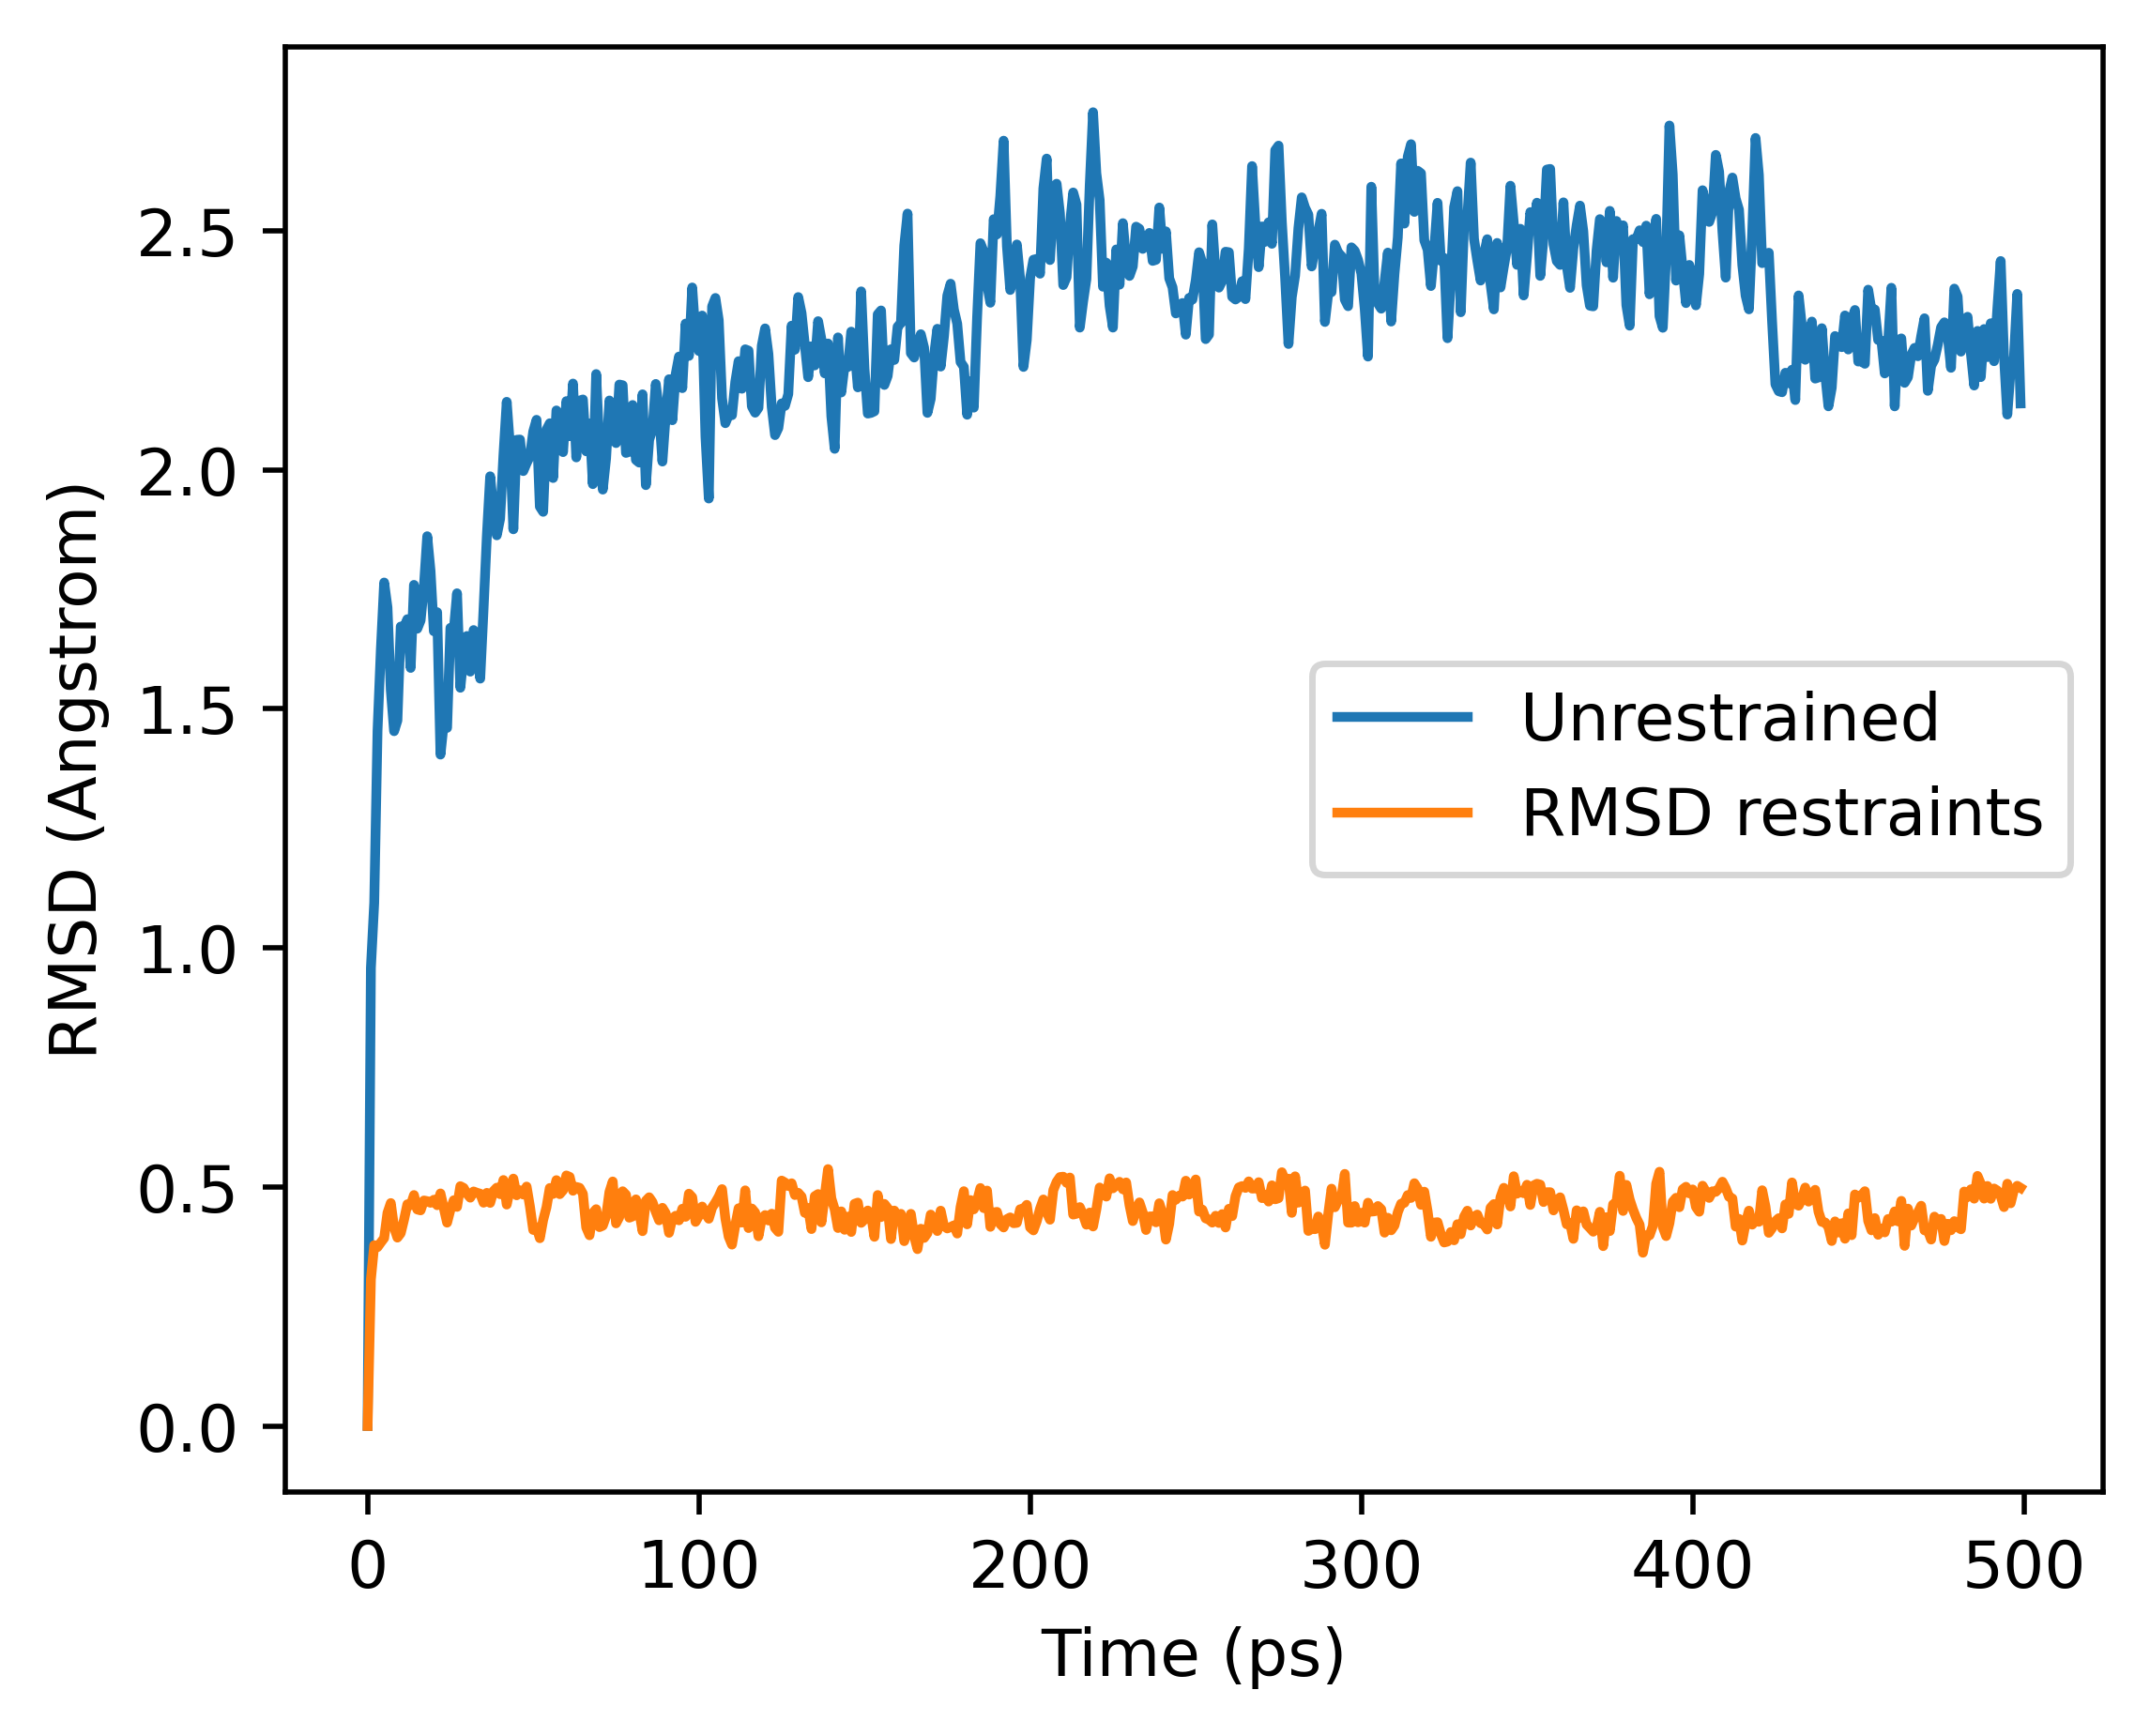

In [4]:
# Run dynamics with the unrestrained protein
mols = sr.load('structures/1UBQ.bss')
mols = mols["molecule property is_perturbable"]
mols = sr.morph.link_to_reference(mols)
mols = mols.minimisation().run().commit()
d = mols.dynamics(timestep="4fs", temperature="25oC")
d.run("500ps", "1ps")
mols = d.commit()
rmsd_unrestrained = obtain_rmsd(mols)

# Apply backbone RMSD restraints and run dynamics
mols_restr = sr.load('structures/1UBQ.bss')
mols_restr = mols_restr["molecule property is_perturbable"]
mols_restr = sr.morph.link_to_reference(mols_restr)
restraints = sr.restraints.rmsd(mols_restr, atoms="atomname CA, C, N", k="300 kcal mol-1 A-2")
mols_restr = mols_restr.minimisation(restraints=restraints).run().commit()
d_restr = mols_restr.dynamics(timestep="4fs", temperature="25oC", restraints=restraints)
d_restr.run("500ps", "1ps")
mols_restr = d_restr.commit()
rmsd_restrained = obtain_rmsd(mols_restr)

# Plot RMSD
plt.figure(figsize=(5,4), dpi=500)
plt.plot(rmsd_unrestrained, label='Unrestrained')
plt.plot(rmsd_restrained, label='RMSD restraints')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Angstrom)')
plt.legend()
plt.show()

Now let's set the force constant to zero and ensure we get unrestrained dynamics:

dynamics                  29 s 4315.6 steps / s          


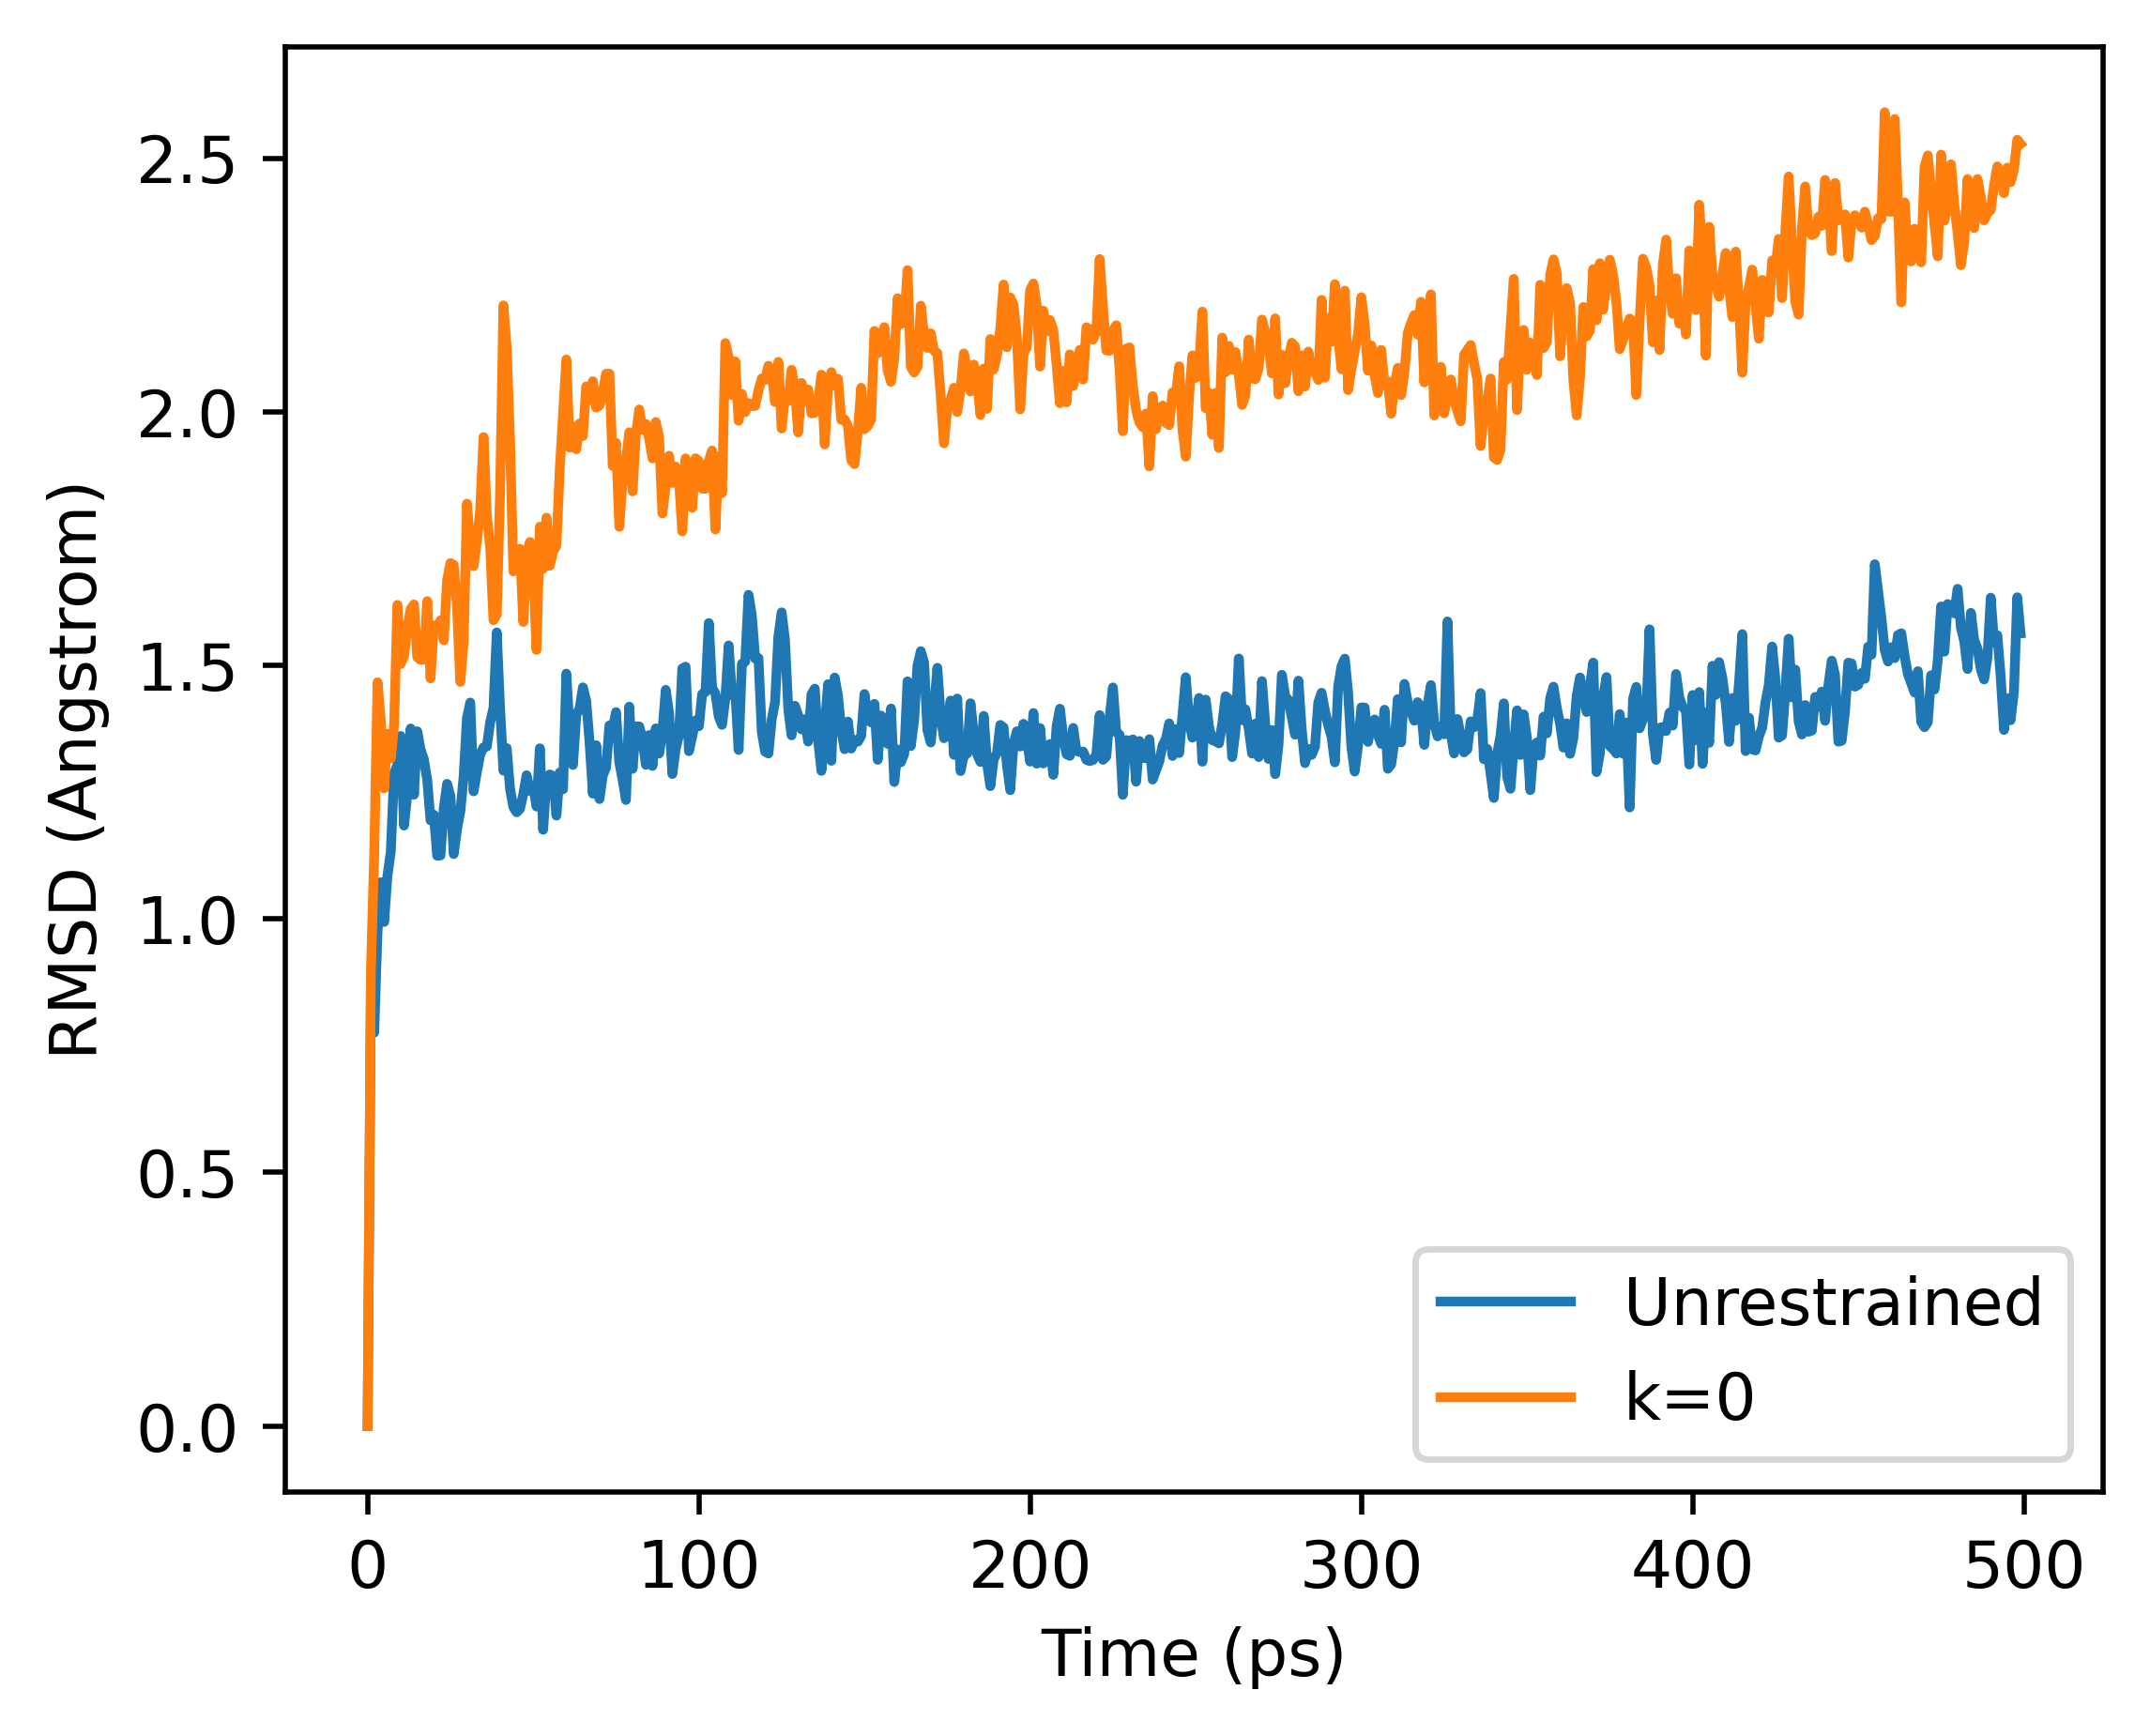

In [ ]:
# Run dynamics with the unrestrained protein
mols = sr.load('structures/1UBQ.bss')
mols = mols["molecule property is_perturbable"]
mols = sr.morph.link_to_reference(mols)
mols = mols.minimisation().run().commit()
d = mols.dynamics(timestep="4fs", temperature="25oC")
d.run("500ps", "1ps")
mols = d.commit()
rmsd_unrestrained = obtain_rmsd(mols)

# Apply backbone RMSD restraints (zero force constant) and run dynamics
mols_restr = sr.load('structures/1UBQ.bss')
mols_restr = mols_restr["molecule property is_perturbable"]
mols_restr = sr.morph.link_to_reference(mols_restr)
restraints = sr.restraints.rmsd(mols_restr, atoms="atomname CA, C, N", k="0 kcal mol-1 A-2")
mols_restr = mols_restr.minimisation(restraints=restraints).run().commit()
d_restr = mols_restr.dynamics(timestep="4fs", temperature="25oC", restraints=restraints)
d_restr.run("500ps", "1ps")
mols_restr = d_restr.commit()
rmsd_restrained = obtain_rmsd(mols_restr)

# Plot RMSD
plt.figure(figsize=(5,4), dpi=500)
plt.plot(rmsd_unrestrained, label='Unrestrained')
plt.plot(rmsd_restrained, label='k=0')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Angstrom)')
plt.legend()
plt.show()

## Applying multiple restraints

Create two restraints in one container:

dynamics                 110 s 1136.5 steps / s          


/home/btan/miniconda3/envs/openbiosim-dev/lib/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/btan/miniconda3/envs/openbiosim-dev/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


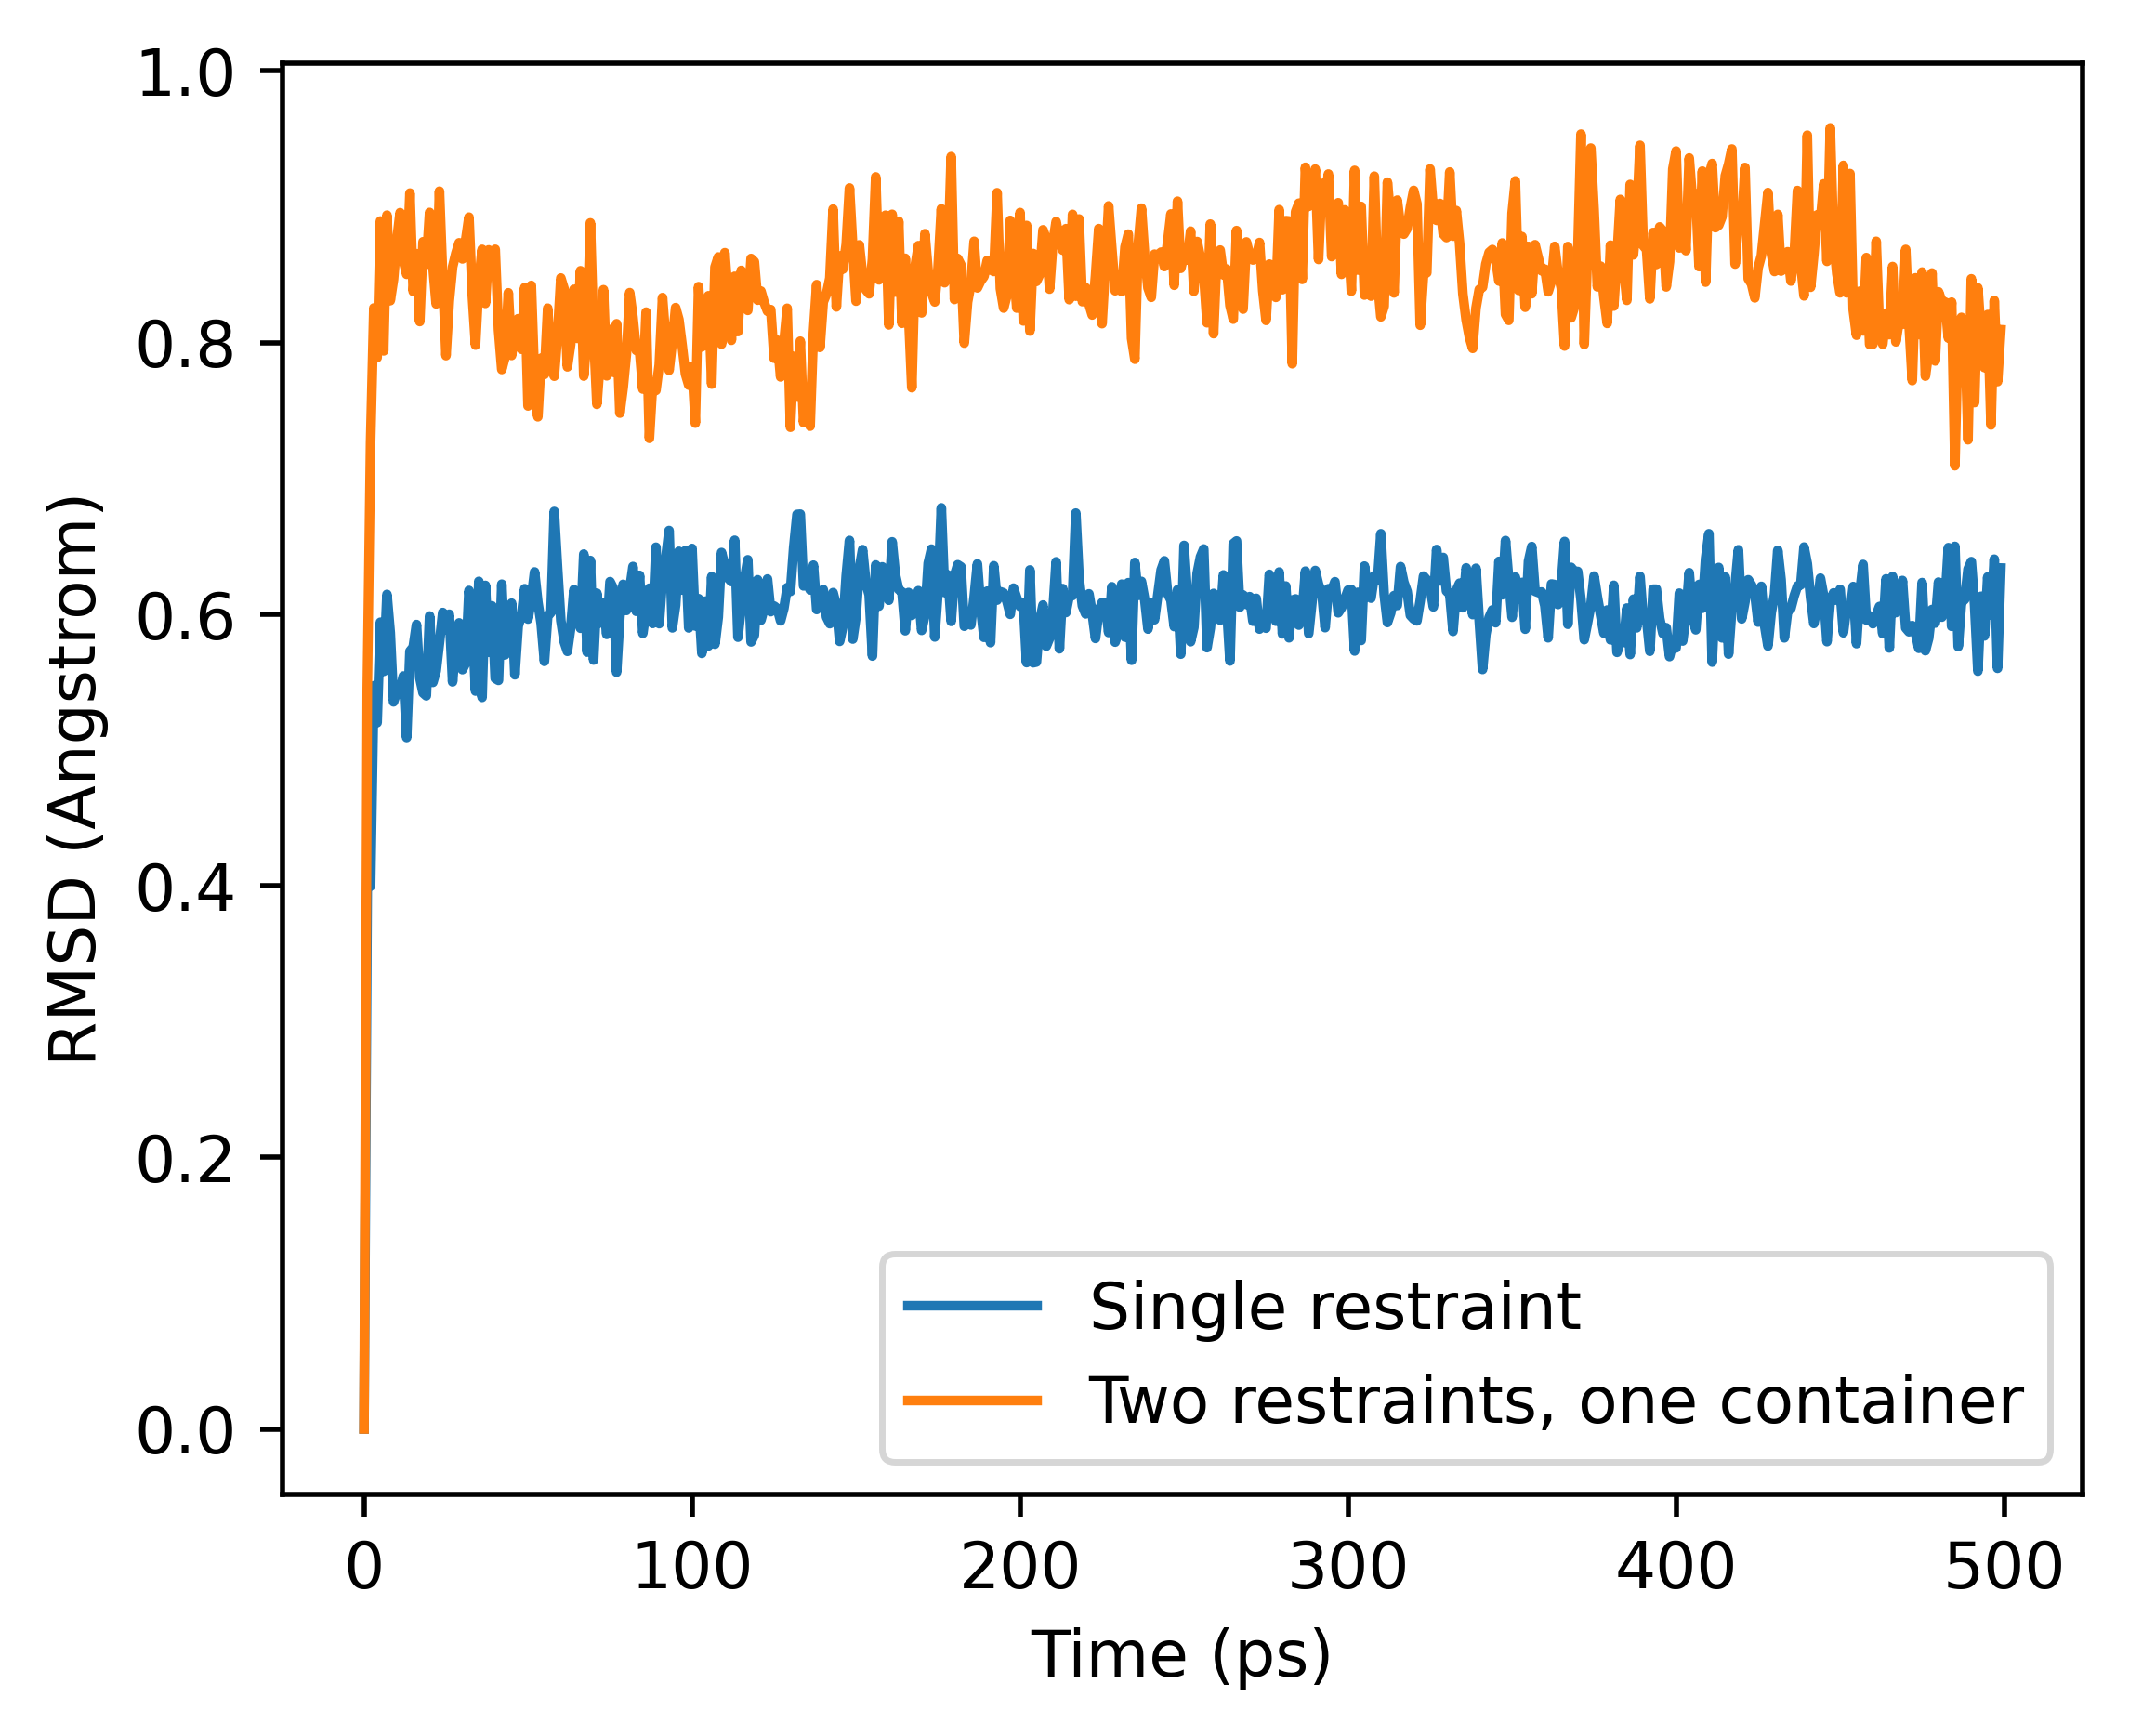

In [3]:
# Apply backbone RMSD restraints and run dynamics
mols_restr_all = sr.load('structures/1UBQ.bss')
mols_restr_all = mols_restr_all["molecule property is_perturbable"]
mols_restr_all = sr.morph.link_to_reference(mols_restr_all)
restraints_all = sr.restraints.rmsd(mols_restr_all, atoms="atomname CA, C, N", k="100 kcal mol-1 A-2")
mols_restr_all = mols_restr_all.minimisation(restraints=restraints_all).run().commit()
d_restr_all = mols_restr_all.dynamics(timestep="4fs", temperature="25oC", restraints=restraints_all)
d_restr_all.run("500ps", "1ps")
mols_restr_all = d_restr_all.commit()
rmsd_restrained_all = obtain_rmsd(mols_restr_all)

# Create two RMSD restraints under the same container
mols_restr = sr.load('structures/1UBQ.bss')
mols_restr = mols_restr["molecule property is_perturbable"]
mols_restr = sr.morph.link_to_reference(mols_restr)

# Restrain residues 1-38
restraints = sr.restraints.rmsd(mols_restr, atoms="atomname CA, C, N and resnum 1:38", k="100 kcal mol-1 A-2")
# Restrain residues 39-76
restraints1 = sr.restraints.rmsd(mols_restr, atoms="atomname CA, C, N and resnum 39:76", k="100 kcal mol-1 A-2")
# Combine the two restraints
restraints.add(restraints1)

mols_restr = mols_restr.minimisation(restraints=restraints).run().commit()
d_restr = mols_restr.dynamics(timestep="4fs", temperature="25oC", restraints=restraints)
d_restr.run("500ps", "1ps")
mols_restr = d_restr.commit()
rmsd_restrained = obtain_rmsd(mols_restr)

# Plot RMSD
plt.figure(figsize=(5,4), dpi=500)
plt.plot(rmsd_restrained_all, label='Single restraint')
plt.plot(rmsd_restrained, label='Two restraints, one container')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Angstrom)')
plt.legend()
plt.show()

# Alchemical restraints

This tests the restraints compatibility with the lambda lever code used to alchemically scale the strength of restraining potentials.

In [15]:
mols_alch = sr.load('structures/1UBQ.bss')
mols_alch = mols_alch["molecule property is_perturbable"]
mols_alch = sr.morph.link_to_reference(mols_alch)

# Apply RMSD restraints
RMSD_restraints = sr.restraints.rmsd(mols_alch, atoms='atomname CA, C, N', k="50 kcal mol-1 A-2", name="RMSD")

# Create lambda schedule, lambda=1 corresponds to restraints fully on, lambda=0 means restraints are off
l = sr.cas.LambdaSchedule()
l.add_stage("turn_off_rmsd_restraints", l.initial())
l.set_equation(stage="turn_off_rmsd_restraints", lever="RMSD",
               equation=l.lam())

rmsd_data_alch = {} # Dictionary to store sampled RMSD values
l_values = [0.0, 0.25, 0.5, 0.75, 1.0] # Specify lambda values

for lambda_value in l_values:

    # turn l into the lambda value by dividing by 100
    lambda_value = np.round(lambda_value, 4)
    print(f"\nSimulating lambda={lambda_value:.2f}")

    mols_alch = mols_alch.minimisation(lambda_value=lambda_value, schedule=l, restraints=RMSD_restraints).run().commit()
    d = mols_alch.dynamics(timestep="4fs", temperature="25oC", restraints=RMSD_restraints, schedule=l,
                            lambda_value=lambda_value)
    
    d.randomise_velocities() 
    d.run("2000ps", "1ps")
    mols_alch = d.commit()

    RMSD = obtain_rmsd(mols_alch, selection_str='atomname CA, C, N')
    rmsd_data_alch[lambda_value] = RMSD
    mols_alch.delete_all_frames()

dynamics                 117 s 4284.7 steps / s          


We have gradually turned on the RMSD restraints from lambda=0 (no restraints) to lambda=1 (restraints fully on). This can be shown by the decreasing average RMSD in the plot below:

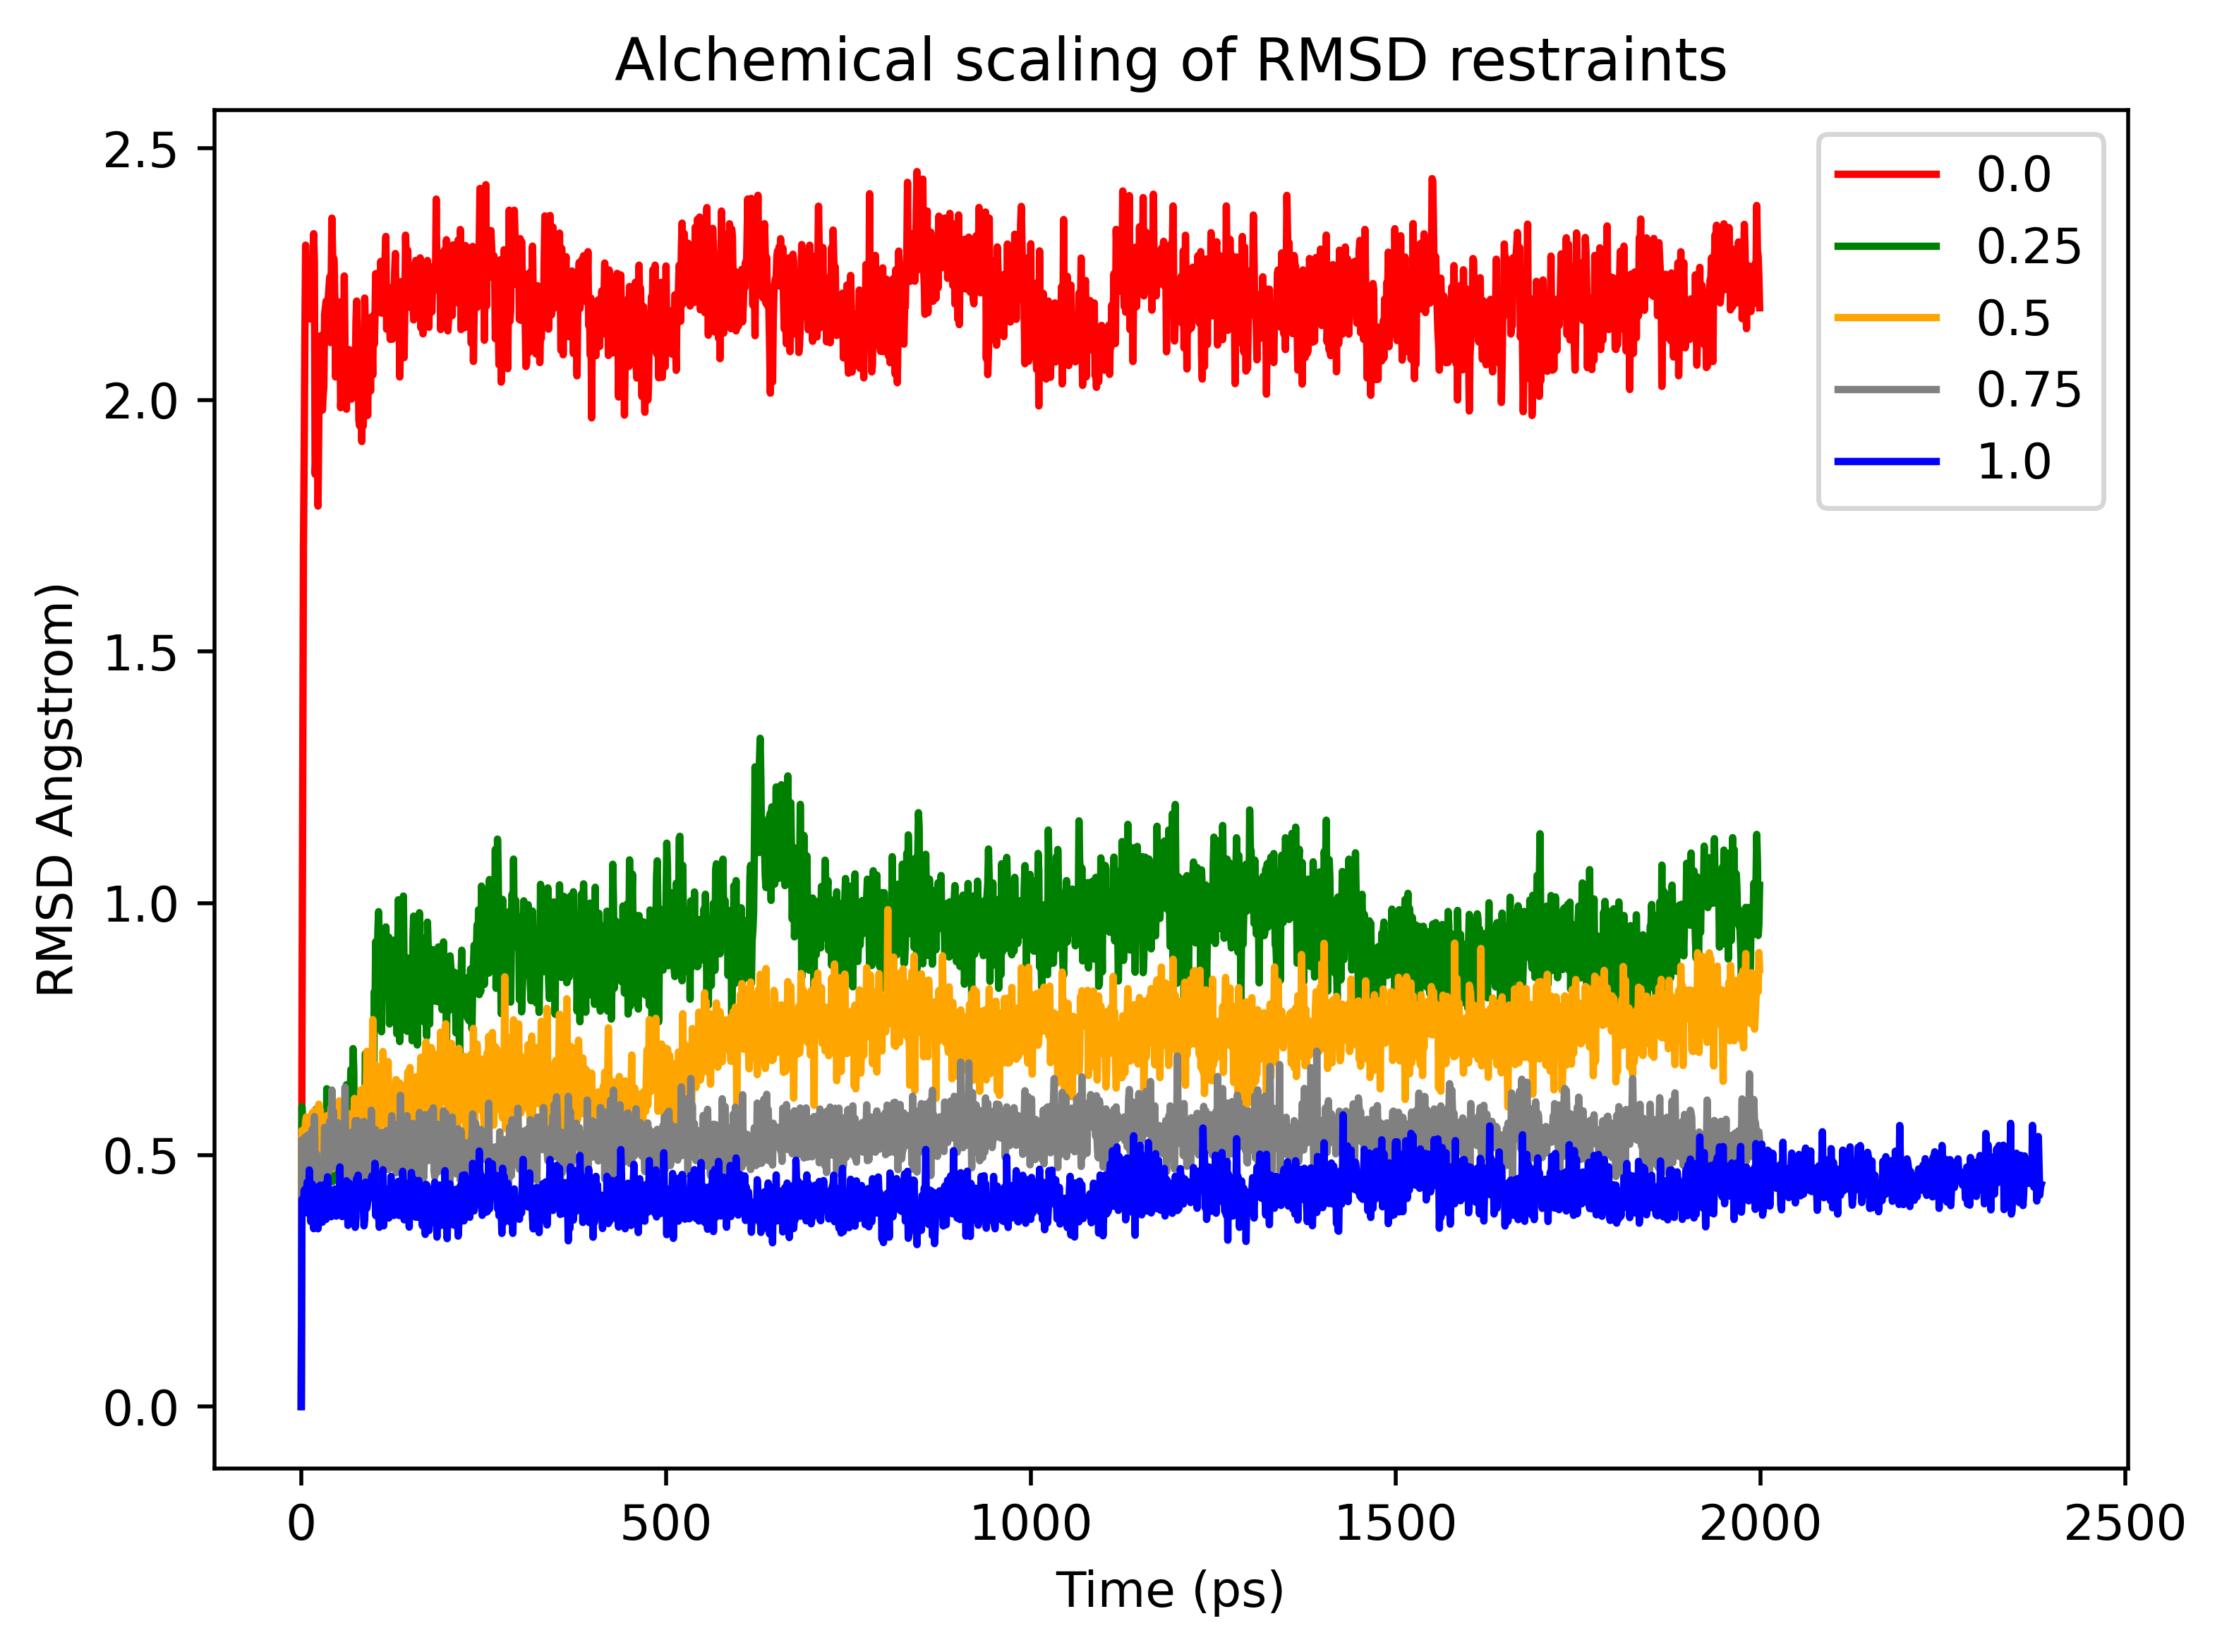

In [19]:
colours = {0.0:'r', 0.25:'g', 0.5:'orange', 0.75:'grey', 1.0:'b'}
plt.figure(figsize=(7,5), dpi=500)
plt.title('Alchemical scaling of RMSD restraints')

for l in l_values: 
    
    plt.plot(rmsd_data_alch[l], label=l, c=colours[l])
            
plt.ylabel('RMSD Angstrom)')
plt.xlabel('Time (ps)')
plt.legend()
plt.show()